<a href="https://colab.research.google.com/github/Nidzam81/Computer-Vision/blob/main/Master_project_FRCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 24457 (delta 1), reused 0 (delta 0), pack-reused 24439
Receiving objects: 100% (24457/24457), 563.42 MiB | 28.59 MiB/s, done.
Resolving deltas: 100% (14534/14534), done.
Checking out files: 100% (2768/2768), done.


In [ ]:
!apt-get install -qq protobuf-compiler python-tk

In [ ]:
!pip install -q Cython contextlib2 pillow lxml matplotlib PyDrive

    100% |████████████████████████████████| 993kB 20.6MB/s 


In [ ]:
!pip install opencv-python

In [ ]:
!pip install -q pycocotools

In [ ]:
!pwd
!ls
%cd models


/content
models	sample_data
/content/models


In [ ]:
import os
os.environ['PYTHONPATH'] += ':/root/content/models/research/:/root/content/models/research/slim/:/content/models/research/:/content/models/research/object_detection:/content/models/research/slim/'

In [ ]:
%cd research
!protoc object_detection/protos/*.proto --python_out=.

/content/models/research


In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
!ls

a3c_blogpost			  lstm_object_detection
adversarial_crypto		  marco
adversarial_logit_pairing	  maskgan
adversarial_text		  minigo
adv_imagenet_models		  morph_net
astronet			  namignizer
attention_ocr			  neural_gpu
audioset			  neural_programmer
autoaugment			  next_frame_prediction
autoencoder			  nst_blogpost
brain_coder			  object_detection
cognitive_mapping_and_planning	  pcl_rl
cognitive_planning		  ptn
compression			  qa_kg
cvt_text			  README.md
deep_contextual_bandits		  real_nvp
deeplab				  rebar
deep_speech			  resnet
delf				  sentiment_analysis
differential_privacy		  seq2species
domain_adaptation		  setup.py
efficient-hrl			  skip_thoughts
fivo				  slim
gan				  steve
global_objectives		  street
im2txt				  struct2depth
inception			  swivel
keypointnet			  syntaxnet
learned_optimizer		  tcn
learning_to_remember_rare_events  tensorrt
learning_unsupervised_learning	  textsum
lexnet_nc			  transformer
lfads				  vid2depth
lm_1b				  video_prediction
lm_commonsense


In [ ]:
!rm -r object_detection

In [ ]:
!ls

a3c_blogpost			  lm_commonsense
adversarial_crypto		  lstm_object_detection
adversarial_logit_pairing	  marco
adversarial_text		  maskgan
adv_imagenet_models		  minigo
astronet			  morph_net
attention_ocr			  namignizer
audioset			  neural_gpu
autoaugment			  neural_programmer
autoencoder			  next_frame_prediction
brain_coder			  nst_blogpost
cognitive_mapping_and_planning	  pcl_rl
cognitive_planning		  ptn
compression			  qa_kg
cvt_text			  README.md
deep_contextual_bandits		  real_nvp
deeplab				  rebar
deep_speech			  resnet
delf				  sentiment_analysis
differential_privacy		  seq2species
domain_adaptation		  setup.py
efficient-hrl			  skip_thoughts
fivo				  slim
gan				  steve
global_objectives		  street
im2txt				  struct2depth
inception			  swivel
keypointnet			  syntaxnet
learned_optimizer		  tcn
learning_to_remember_rare_events  tensorrt
learning_unsupervised_learning	  textsum
lexnet_nc			  transformer
lfads				  vid2depth
lm_1b				  video_prediction


IMPORTING CUSTOMIZED OBJECT DETECTION FOLDER FROM GOOGLE DRIVE

In [ ]:
fileId = '1yJCpw_FcmReKdy1ikdwWUhYGU_KTU2_I'

import os
from zipfile import ZipFile
from shutil import copy
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fileName = fileId + '.zip'
downloaded = drive.CreateFile({'id': fileId})
downloaded.GetContentFile(fileName)
ds = ZipFile(fileName)
ds.extractall()
os.remove(fileName)
print('Extracted zip file ' + fileName)

Extracted zip file 1yJCpw_FcmReKdy1ikdwWUhYGU_KTU2_I.zip


In [ ]:
!ls

a3c_blogpost			  lstm_object_detection
adversarial_crypto		  marco
adversarial_logit_pairing	  maskgan
adversarial_text		  minigo
adv_imagenet_models		  morph_net
astronet			  namignizer
attention_ocr			  neural_gpu
audioset			  neural_programmer
autoaugment			  next_frame_prediction
autoencoder			  nst_blogpost
brain_coder			  object_detection
cognitive_mapping_and_planning	  pcl_rl
cognitive_planning		  ptn
compression			  qa_kg
cvt_text			  README.md
deep_contextual_bandits		  real_nvp
deeplab				  rebar
deep_speech			  resnet
delf				  sentiment_analysis
differential_privacy		  seq2species
domain_adaptation		  setup.py
efficient-hrl			  skip_thoughts
fivo				  slim
gan				  steve
global_objectives		  street
im2txt				  struct2depth
inception			  swivel
keypointnet			  syntaxnet
learned_optimizer		  tcn
learning_to_remember_rare_events  tensorrt
learning_unsupervised_learning	  textsum
lexnet_nc			  transformer
lfads				  vid2depth
lm_1b				  video_prediction
lm_commonsense


In [ ]:
#!mv object_detection_FRCNN  object_detection

In [ ]:
!python setup.py build

running build


In [ ]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating object_detection.egg-info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
writing manifest file 'object_detection.egg-info/SOURCES.txt'
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/dependency_links.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/requires.txt -> build/bdist.li

In [ ]:
%cd object_detection/

/content/models/research/object_detection


In [ ]:
!python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=train.record

Successfully created the TFRecords: /content/models/research/object_detection/train.record


In [ ]:
!python generate_tfrecord.py --csv_input=images/test_labels.csv --image_dir=images/test --output_path=test.record

Successfully created the TFRecords: /content/models/research/object_detection/test.record


In [ ]:
# training 
#!python train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/ssd_inception_v2_coco.config

# INFERENCE

In [ ]:
#!python Object_detection_image.py

2019-02-06 04:18:51.341507: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-02-06 04:18:51.341798: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x3907080 executing computations on platform Host. Devices:
2019-02-06 04:18:51.341842: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-02-06 04:18:51.437877: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-02-06 04:18:51.438482: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x3907a20 executing computations on platform CUDA. Devices:
2019-02-06 04:18:51.438527: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla K80, Compute Capability 3.7
2019-02-06 04:18:51.438935: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1433] Found d

# INFERENCE

In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

#if tf.__version__ < '1.4.0':
#  raise ImportError('Please upgrade your tensorflow installation to v1.4.* or later!')

In [ ]:
%matplotlib inline

In [ ]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [ ]:
# Name of the directory containing the object detection module we're using
MODEL_NAME = 'inference_graph'
IMAGE_NAME = 'test1.jpg'

# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_FROZEN_GRAPH = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'training','labelmap.pbtxt')

# Path to image
PATH_TO_IMAGE = os.path.join(CWD_PATH,IMAGE_NAME)

# Number of classes the object detector can identify
NUM_CLASSES = 4

In [ ]:
print(PATH_TO_IMAGE)

/content/models/research/object_detection/test1.jpg


In [ ]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [ ]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [ ]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [ ]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = PATH_TO_IMAGE

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [ ]:
print(TEST_IMAGE_PATHS)

/content/models/research/object_detection/test1.jpg


In [ ]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

In [ ]:
#print(image_path)
image_path='/content/models/research/object_detection/test1.jpg'
print(image_path)

/content/models/research/object_detection/test1.jpg


Lorry


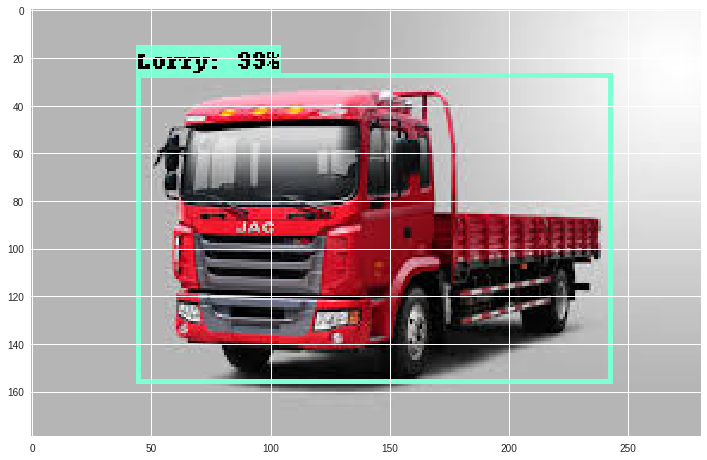

In [ ]:

image = Image.open(image_path)
# the array based representation of the image will be used later in order to prepare the
# result image with boxes and labels on it.
image_np = load_image_into_numpy_array(image)
# Expand dimensions since the model expects images to have shape: [1, None, None, 3]
image_np_expanded = np.expand_dims(image_np, axis=0)
# Actual detection.
output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=2)
plt.figure(figsize=IMAGE_SIZE)
plt.imshow(image_np)